# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import re

# Load Dataset

**TRAIN SET**

In [2]:
df_train_trx = pd.read_csv('data/train_transaction.csv')

In [3]:
df_train_idt = pd.read_csv('data/train_identity.csv')

In [4]:
df_train_trx.shape

(590540, 394)

In [5]:
df_train_idt.shape

(144233, 41)

In [6]:
df_train = pd.merge(df_train_trx, df_train_idt, on='TransactionID', how='left')

In [7]:
df_train.shape

(590540, 434)

In [8]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [9]:
del df_train_trx, df_train_idt

**TEST SET**

In [10]:
df_test_trx = pd.read_csv('data/test_transaction.csv')

In [11]:
df_test_trx.shape

(506691, 393)

In [12]:
df_test_trx.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since there is no target column `isFraud`, so there is one column fewer than the train set.

In [13]:
df_test_idt = pd.read_csv('data/test_identity.csv')

In [14]:
df_test_idt.shape

(141907, 41)

In [15]:
df_test_idt.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [16]:
df_test = pd.merge(df_test_trx, df_test_idt, on='TransactionID', how='left')

In [17]:
df_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since there are column names that are not consistent with the train dataset, so adjust the column names accordingly.

In [18]:
df_test.columns.values

array(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1',
       'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1',
       'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
       'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2',
       'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59',
       'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68',
       

In [19]:
df_test.columns = df_test.columns.str.replace("-", "_")

In [20]:
df_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
del df_test_trx, df_test_idt

# Define Resuable Functions

In [22]:
## Function to return basic information of dataframe
def summarytable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing_Percentage'] = np.round(df.isnull().sum().values/df.shape[0],2)
    summary['Uniques'] = df.nunique().values
    summary['Uniques_Percentage'] = np.round(df.nunique().values/df.shape[0],2)
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    summary['Last Value'] = df.iloc[-1].values

    return summary

# reference: https://www.kaggle.com/code/kabure/extensive-eda-and-modeling-xgb-hyperopt#Features-[id_12-to-id_38]

def CalcOutliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

# undestanding quantile of a dataframe
def quantile_col(df, column):
    quantile = df.groupby('isFraud')[column].quantile([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).unstack()
    return quantile

In [23]:
# Define plotting functions

# comparing distribution of categorical/object variables between two classes
def category_plot(df, name1, name2='isFraud'):
    count_df = df.groupby([str(name1), str(name2)])[str(name1)].count().unstack()
    distribution_df = pd.crosstab(df[str(name1)], df[str(name2)], normalize='index')
    my_colors=['cornflowerblue', 'lightsalmon']
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
    count_df.plot(kind='barh', stacked=True, ax=axes[0], color=my_colors, title=f'Counts of category {name1}')
    distribution_df.plot(kind='barh', stacked=True, ax=axes[1], color=my_colors, title=f'Distribution of category {name1}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# combining counts and percentage of target varialbe  
def category_plot2(df, name1, name2='isFraud'):
    percent = df.groupby(name1)[name2].mean()*100
    # fig, ax1 = plt.subplots()
    ax1 = sns.countplot(x=df[name1], order=list(percent.index), palette='pastel', width=0.6)
    ax2 = ax1.twinx()
    ax2 = sns.pointplot(x=percent.index, y=percent.values, color='silver', order=list(percent.index), dodge=True, scale=0.7)
    ax1.bar_label(ax1.containers[0])
    ax1.set_ylabel('# of transactions')
    ax2.set_ylabel('% of fraudulent transactions') 

# comparing distribution of numeric variables between two classes
def histcompare_plot(df, name1, name2='isFraud'):
    plt.figure(figsize=(6,3))
    sns.histplot(data=df[df[name2]==0], x=name1, label='Not Fraud', bins=25, stat='probability', color='cornflowerblue', edgecolor='white', alpha=0.5)
    sns.histplot(data=df[df[name2]==1], x=name1, label='Fraud', bins=25, stat='probability', color='lightsalmon', edgecolor='white', alpha=0.5)
    plt.title(f'Distribution of {name1}')
    plt.legend()
    plt.show()

# plotting for batches
def histcompare_plot2(df, name1, name2='isFraud'):
    sns.histplot(data=df[df[name2]==1], x=name1, label='Fraud', bins=25, stat='probability', color='lightsalmon', edgecolor='white', alpha=0.5)
    sns.histplot(data=df[df[name2]==0], x=name1, label='Not Fraud', bins=25, stat='probability', color='cornflowerblue', edgecolor='white', alpha=0.5)
    plt.title(f'Distribution of {name1}')
    plt.legend()

# plotting histogram for numeric variables with kde
def hist_plot(df, column):
    sns.histplot(data=df[column], color='cornflowerblue', kde=True, edgecolor='white')
    plt.axvline(df[column].mean(), c='orange', label='Mean')
    plt.legend()

# Data Cleaning and Preprocessing

In [24]:
# function reference: https://www.kaggle.com/code/kabure/baseline-fraud-detection-eda-interactive-views/notebook?scriptVersionId=17308287

summary_train = summarytable(df_train)

Dataset Shape: (590540, 434)


In [25]:
# Understand datatypes, missing values, unique values etc.
summary_train[:20]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
0,TransactionID,int64,0,0.00,590540,1.00,2987000,2987001,2987002,3577539
1,isFraud,int64,0,0.00,2,0.00,0,0,0,0
2,TransactionDT,int64,0,0.00,573349,0.97,86400,86401,86469,15811131
3,TransactionAmt,float64,0,0.00,20902,0.04,68.5,29.0,59.0,279.95
4,ProductCD,object,0,0.00,5,0.00,W,W,W,W
5,card1,int64,0,0.00,13553,0.02,13926,2755,4663,15066
6,card2,float64,8933,0.02,500,0.00,NaN,404.0,490.0,170.0
7,card3,float64,1565,0.00,114,0.00,150.0,150.0,150.0,150.0
8,card4,object,1577,0.00,4,0.00,discover,mastercard,visa,mastercard
9,card5,float64,4259,0.01,119,0.00,142.0,102.0,166.0,102.0


**NOTE**

- There is no duplicated transactions in the dataset, since the Uniques_Percentage for TransactionID is 100%.

## Missing Values

In [26]:
summary_train[summary_train['Missing_Percentage'] >= 0.8]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
14,dist2,float64,552913,0.94,1751,0.00,NaN,NaN,NaN,NaN
36,D6,float64,517353,0.88,829,0.00,NaN,NaN,NaN,NaN
37,D7,float64,551623,0.93,597,0.00,NaN,NaN,NaN,NaN
38,D8,float64,515614,0.87,12353,0.02,NaN,NaN,NaN,NaN
39,D9,float64,515614,0.87,24,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
423,id_30,object,512975,0.87,75,0.00,NaN,NaN,NaN,NaN
425,id_32,float64,512954,0.87,4,0.00,NaN,NaN,NaN,NaN
426,id_33,object,517251,0.88,260,0.00,NaN,NaN,NaN,NaN
427,id_34,object,512735,0.87,4,0.00,NaN,NaN,NaN,NaN


In [27]:
summary_train[summary_train['Missing_Percentage'] >= 0.8]['Name'].values

array(['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138',
       'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146',
       'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154',
       'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162',
       'V163', 'V164', 'V165', 'V166', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_03', 'id_04',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_14', 'id_18', 'id_21',
       'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_30',
       'id_32', 'id_33', 'id_34', 'DeviceInfo'], dtype=object)

In [28]:
top_missing_columns = summary_train[summary_train['Missing_Percentage'] >= 0.8]['Name'].values

**NOTE**

There are 75 columns that have missing values greater and equal than 80%. So, dropping these columns for further processing.

### Drop columns that have large amount of missing values

In [29]:
df_train.drop(columns=top_missing_columns, inplace=True)

In [30]:
df_train.shape

(590540, 359)

In [31]:
df_test.drop(columns=top_missing_columns, inplace=True)

In [32]:
df_test.shape

(506691, 358)

In [33]:
# summary table after column drop

summary = summarytable(df_train)

Dataset Shape: (590540, 359)


In [34]:
summary.head()

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
0,TransactionID,int64,0,0.0,590540,1.00,2987000,2987001,2987002,3577539
1,isFraud,int64,0,0.0,2,0.00,0,0,0,0
2,TransactionDT,int64,0,0.0,573349,0.97,86400,86401,86469,15811131
3,TransactionAmt,float64,0,0.0,20902,0.04,68.5,29.0,59.0,279.95
4,ProductCD,object,0,0.0,5,0.00,W,W,W,W


# EDA

## Target Variable Distribution

In [38]:
df_train['isFraud'].value_counts(normalize=True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

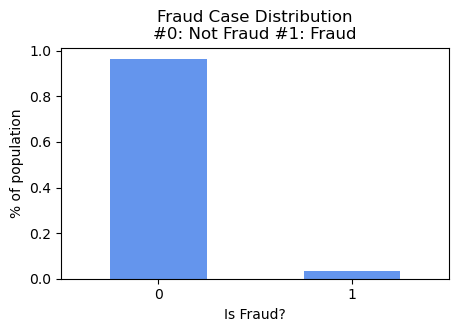

In [39]:
# understand the target variable `isFraud` distribution

plt.figure(figsize=(5, 3))
df_train['isFraud'].value_counts(normalize=True).plot(kind='bar', color='cornflowerblue')
plt.ylabel('% of population')
plt.xlabel('Is Fraud?')
plt.title('Fraud Case Distribution\n#0: Not Fraud #1: Fraud')
plt.xticks(rotation=360)
plt.show()

There is significant imbalance between two classes, potential problem to address for modeling later.

## TransactionDT

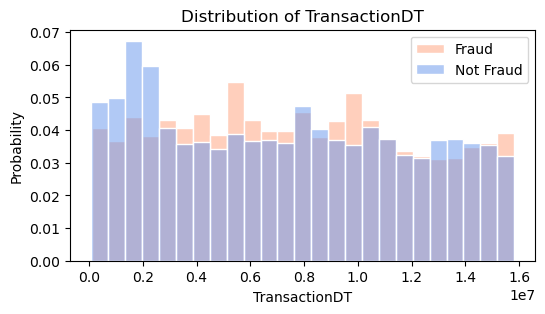

In [40]:
# plot the probability distribution of transactionDF for both fraud and not fruad cases
histcompare_plot(df_train, 'TransactionDT')

In [269]:
df_train['TransactionDT'].max() - df_train['TransactionDT'].min()

15724731

In [270]:
15724731/(24*60*60)

181.99920138888888

## Transaction Amount

In [41]:
df_train['TransactionAmt'].sum()

79738948.735

In [42]:
df_train['TransactionAmt'].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

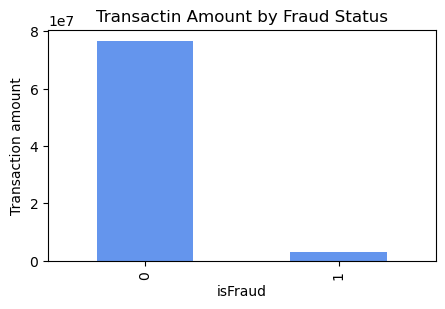

In [43]:
plt.figure(figsize=(5,3))
df_train.groupby('isFraud')['TransactionAmt'].sum().plot(kind='bar', color='cornflowerblue')
plt.ylabel('Transaction amount')
plt.title('Transactin Amount by Fraud Status')
plt.show()

In [44]:
df_train.groupby('isFraud')['TransactionAmt'].quantile([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).unstack()

,0.01,0.10,0.25,0.50,0.75,0.90,0.99
isFraud,,,,,,,
0,9.51288,26.310,43.970,68.5,120.0,267.112,1104.0
1,6.74096,18.936,35.044,75.0,161.0,335.000,994.0


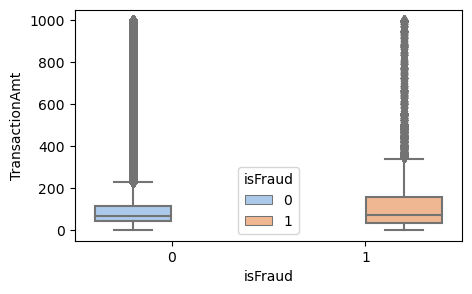

In [55]:
plt.figure(figsize=(5,3))
sns.boxplot(x="isFraud", y="TransactionAmt", data=df_train[df_train['TransactionAmt']<=1000], hue='isFraud');

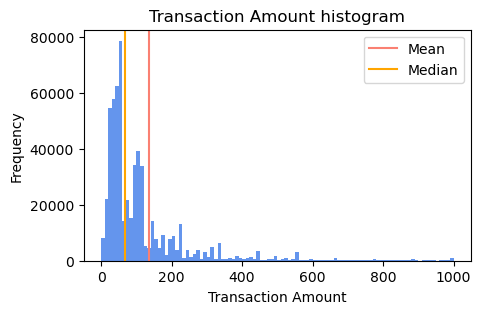

In [46]:
# plot the distribution of transaction amount

plt.figure(figsize=(5, 3))
plt.hist(df_train[df_train['TransactionAmt']<=1000]['TransactionAmt'].values, color='cornflowerblue', bins=100)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount histogram')
plt.axvline(df_train['TransactionAmt'].mean(), c='salmon', label='Mean')
plt.axvline(df_train['TransactionAmt'].median(), c='orange', label='Median')
plt.legend()
plt.show()

In [47]:
CalcOutliers(df_train['TransactionAmt'])

Identified lowest outliers: 0
Identified upper outliers: 10093
Total outlier observations: 10093
Non-outlier observations: 580447
Total percentual of Outliers:  1.7388


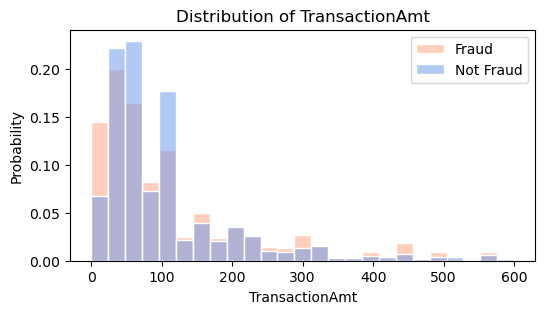

In [48]:
histcompare_plot(df_train[df_train['TransactionAmt']<=600], 'TransactionAmt')

**NOTE**

- Majority of the transaction amount is between 0 to 200, and average is ~135
- Transaction amount is heavily right skewed, with max amount over 30K
- The majority of Fraud cases with values relatively smaller that is between 0 - 100


## ProductCD

In [49]:
df_train.groupby(['ProductCD', 'isFraud'])['ProductCD'].count().unstack()

isFraud,0,1
ProductCD,,
C,60511,8008
H,31450,1574
R,36273,1426
S,10942,686
W,430701,8969


In [57]:
pd.crosstab(df_train['ProductCD'], df_train['isFraud'], normalize='index')*100

isFraud,0,1
ProductCD,,
C,88.312731,11.687269
H,95.233769,4.766231
R,96.217406,3.782594
S,94.100447,5.899553
W,97.960061,2.039939


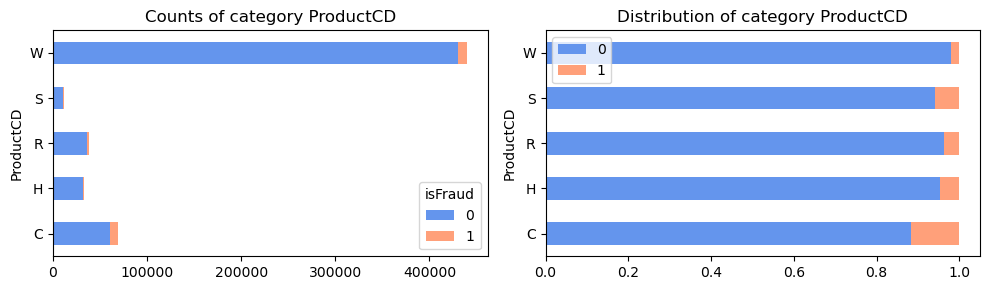

In [37]:
category_plot(df_train, 'ProductCD')

**NOTE**

- Majority of the ProductCD type is W, accounts for over 74% of the data points
- Among the five products, product C has the highest percentage of Fraud

## Card Columns

### Categorical columns - card 4 & card 6

In [59]:
# check column information

summary.loc[summary['Name'].str.startswith('card'), :]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
5,card1,int64,0,0.00,13553,0.02,13926,2755,4663,15066
6,card2,float64,8933,0.02,500,0.00,NaN,404.0,490.0,170.0
7,card3,float64,1565,0.00,114,0.00,150.0,150.0,150.0,150.0
8,card4,object,1577,0.00,4,0.00,discover,mastercard,visa,mastercard
9,card5,float64,4259,0.01,119,0.00,142.0,102.0,166.0,102.0
10,card6,object,1571,0.00,4,0.00,credit,credit,debit,credit


**NOTE**

Overall, these 6 columns contains information about purchaser's card info
- the missing values are minimal

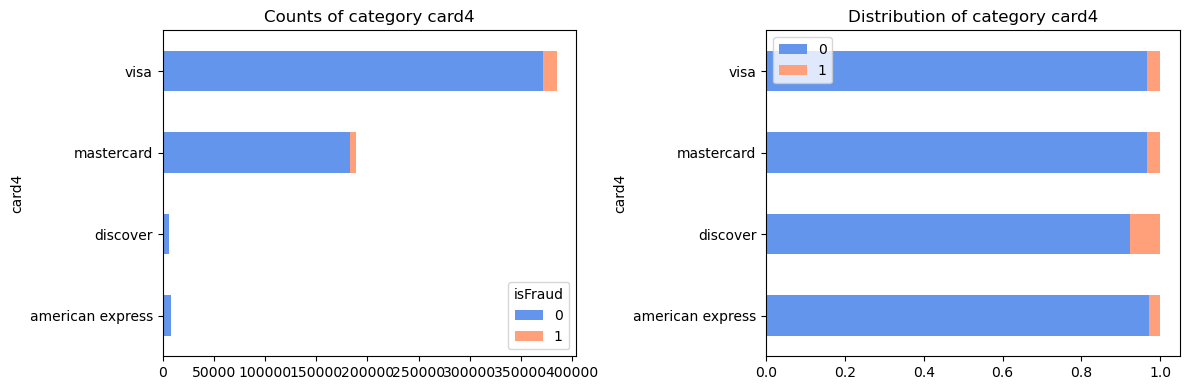

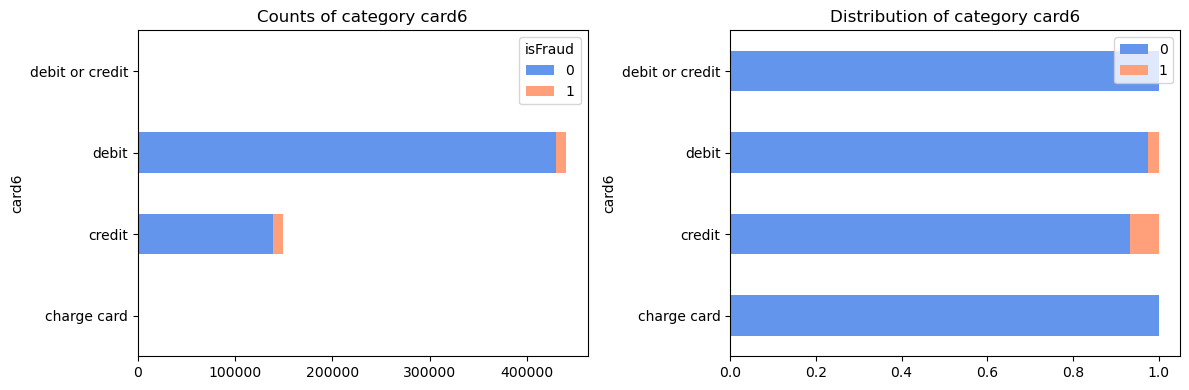

In [35]:
for i in [4, 6]:
    category_plot(df_train, 'card'+str(i), 'isFraud')

In [56]:
card_col_46 = (df_train.columns[8:11:2])

In [57]:
card_col_46

Index(['card4', 'card6'], dtype='object')

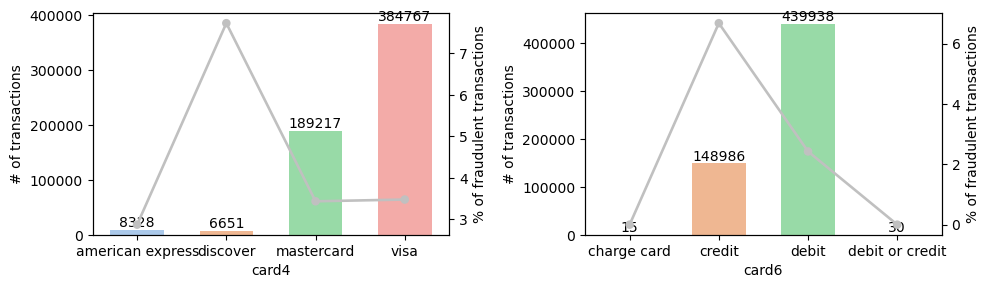

In [36]:
plt.subplots(1, 2, figsize=(10,3))

for i, column in enumerate(df_train.columns[8:11:2], 1):
    plt.subplot(1,2,i)
    category_plot2(df_train, column)
    
plt.tight_layout()
plt.show()

**Note**:
- majority of card types are debit(75%) and credit cards(25%).
- around 2/3 of the cards are issued by Visa and close to 1/3 are issued by Mastercard
- among different card types, credit card has the highest rate of fraud, while cards issued by discover with high fraud rate as well


### Card columns - 1, 2, 3 & 5

In [307]:
# select card columns
card_col = list(df_train.columns[5:8])

In [308]:
card_col.append(df_train.columns[9])
card_col

['card1', 'card2', 'card3', 'card5']

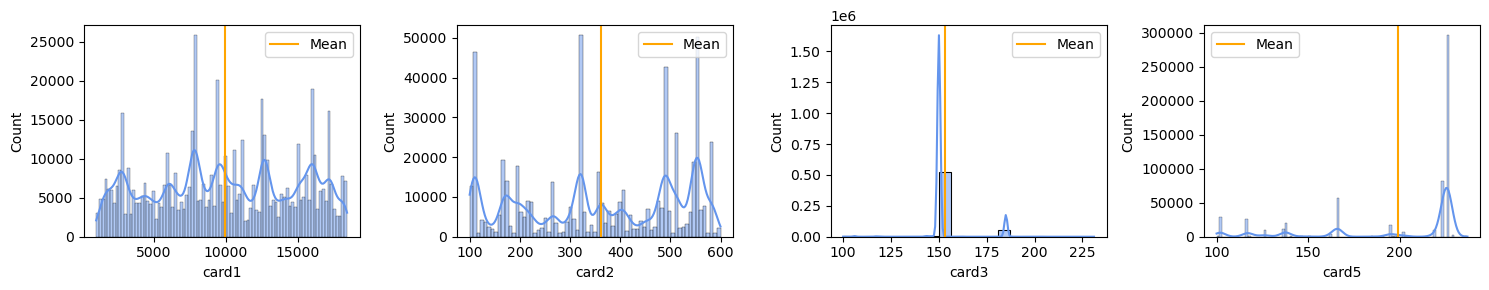

In [310]:
# plot the distribution of card column values

plt.subplots(1, 4, figsize=(15,3))

for i, column in enumerate(card_col, 1):
    plt.subplot(1,4,i)
    sns.histplot(data=df_train[column], color='cornflowerblue', kde=True)
    plt.axvline(df_train[column].mean(), c='orange', label='Mean')
    plt.legend()
    
plt.tight_layout()
plt.show()

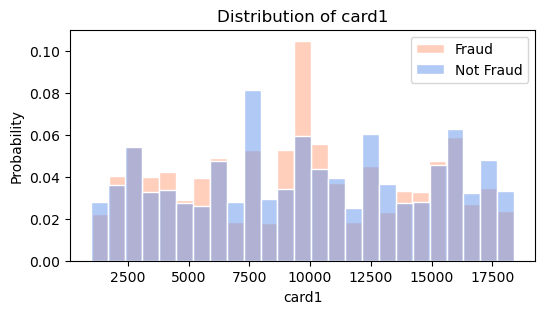

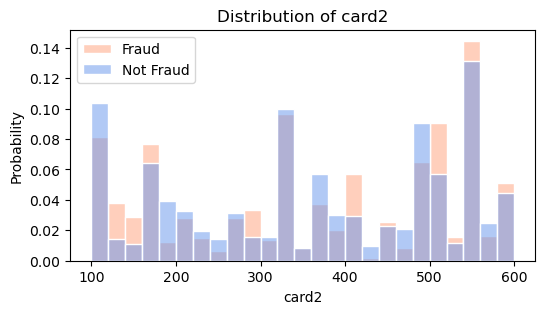

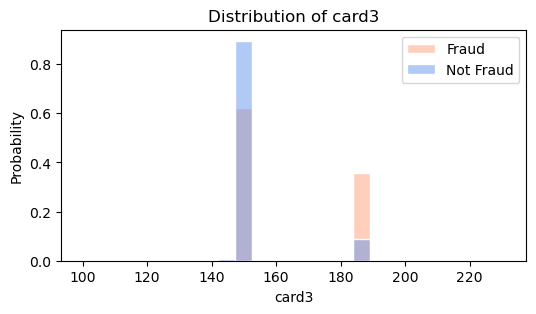

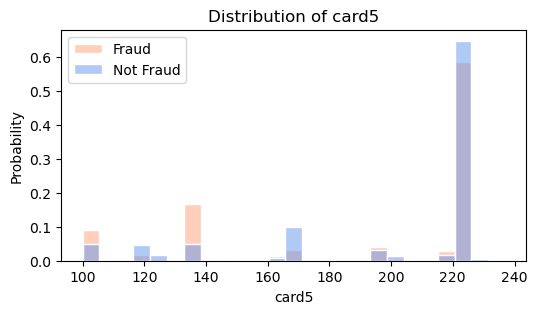

In [61]:
for i in [1, 2, 3, 5]:
    histcompare_plot(df_train, 'card'+str(i))

In [62]:
df_train.loc[:, df_train.columns.str.startswith('card')].describe()

,card1,card2,card3,card5
count,590540.000000,581607.000000,588975.000000,586281.000000
mean,9898.734658,362.555488,153.194925,199.278897
std,4901.170153,157.793246,11.336444,41.244453
min,1000.000000,100.000000,100.000000,100.000000
25%,6019.000000,214.000000,150.000000,166.000000
50%,9678.000000,361.000000,150.000000,226.000000
75%,14184.000000,512.000000,150.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


**Note**

- card1 values spread from 1000 to 18396, with highest proportion of fraud cases in range 9000 to 10k
- card2 with min value of 100 to max 600, with higher proportion of fraud in 150 and 500-550
- card3 values mainly around 150 with some values of ~180, values around ~180 with higher proportion of fraud cases
- card5 majority value is 226, also there's a peak around value of 140 for fraud cases


### Further check card values

Since card 3 and 5 are categorical values with a few key groups, so further look into it and group some of the categorical values.

In [104]:
# look at distribution

df_train['card3'].value_counts(normalize=True)

150.0    0.885075
185.0    0.095668
106.0    0.002667
144.0    0.002126
146.0    0.002126
           ...   
224.0    0.000002
199.0    0.000002
221.0    0.000002
209.0    0.000002
173.0    0.000002
Name: card3, Length: 114, dtype: float64

In [120]:
# group some of the smaller categories into other

bottom_card3 = df_train['card3'].value_counts(normalize=True)
bottom_card3 = bottom_card3[bottom_card3 <0.002]

In [123]:
np.mean(list(bottom_card3.index))

167.69724770642202

## Address

In [63]:
# understand column type and info

summary[(summary['Name'].str.contains('add')) | (summary['Name'].str.contains('dist'))]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
11,addr1,float64,65706,0.11,332,0.0,315.0,325.0,330.0,299.0
12,addr2,float64,65706,0.11,74,0.0,87.0,87.0,87.0,87.0
13,dist1,float64,352271,0.60,2651,0.0,19.0,NaN,287.0,NaN


**NOTE**

`dist1`: 60% of the column information is missing, further check it's values


In [64]:
df_train.loc[:, 'addr1': 'dist1'].describe()

,addr1,addr2,dist1
count,524834.000000,524834.000000,238269.000000
mean,290.733794,86.800630,118.502180
std,101.741072,2.690623,371.872026
min,100.000000,10.000000,0.000000
25%,204.000000,87.000000,3.000000
50%,299.000000,87.000000,8.000000
75%,330.000000,87.000000,24.000000
max,540.000000,102.000000,10286.000000


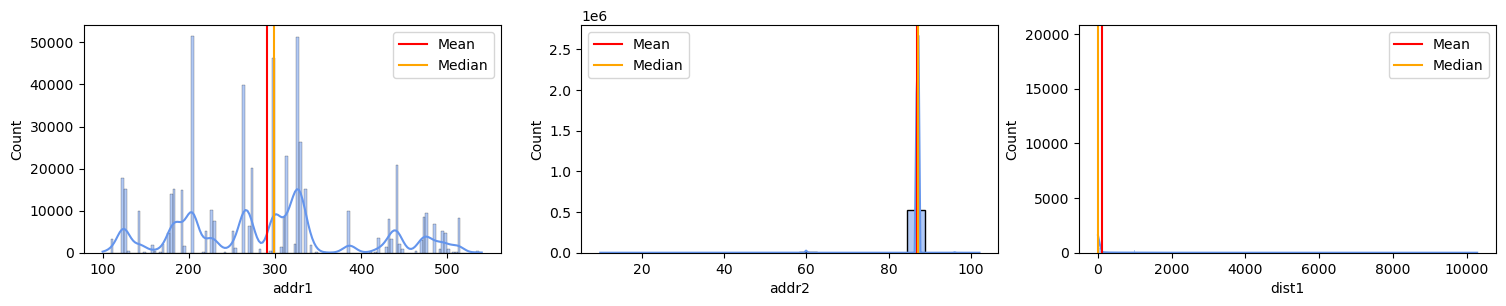

In [65]:
plt.subplots(1, 3, figsize=(15,3))

for i, column in enumerate(df_train.columns[11:14], 1):
    plt.subplot(1,3,i)
    sns.histplot(data=df_train[column], color='cornflowerblue', kde=True)
    plt.axvline(df_train[column].mean(), c='r', label='Mean')
    plt.axvline(df_train[column].median(), c='orange', label='Median')
    plt.legend()
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
plt.show()

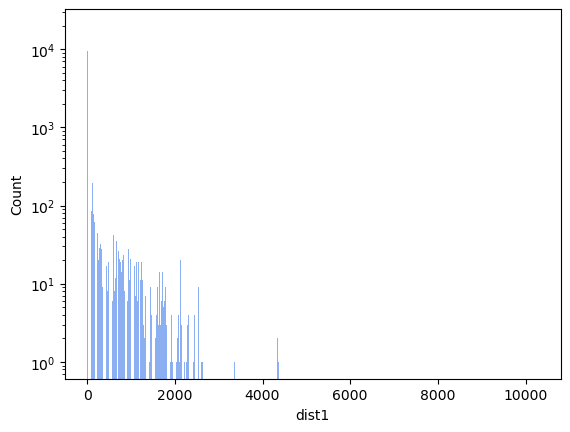

In [66]:
# further check `dist1` value distribution
sns.histplot(df_train['dist1'], color = 'cornflowerblue')
plt.yscale("log")
plt.show()

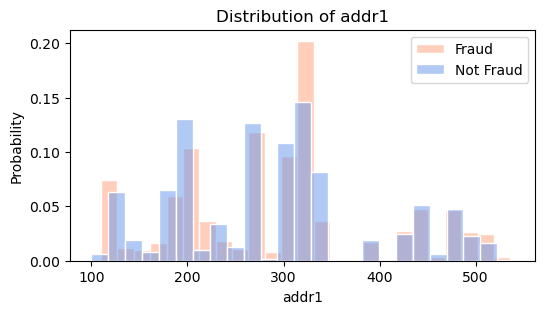

In [67]:
# check distribution of addr1 across two classes
histcompare_plot(df_train, 'addr1')

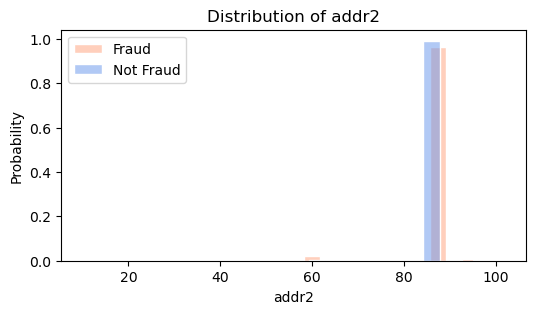

In [68]:
# check distribution of addr2 across two classes
histcompare_plot(df_train, 'addr2')

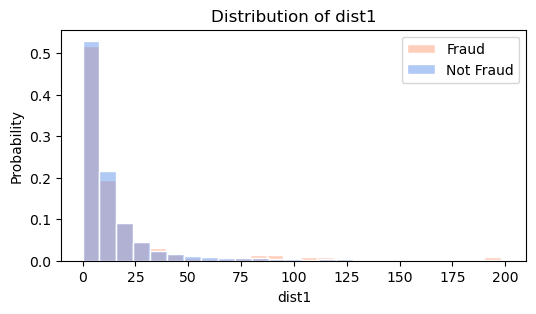

In [69]:
# check distribution of dist1 across two classes, since majority of the values within 200, so check the distribution accordingly
histcompare_plot(df_train[df_train['dist1'] <=200], 'dist1')

In [70]:
df_train['addr2'].value_counts(normalize=True)

87.0    0.991706
60.0    0.005876
96.0    0.001216
32.0    0.000173
65.0    0.000156
          ...   
49.0    0.000002
14.0    0.000002
25.0    0.000002
22.0    0.000002
93.0    0.000002
Name: addr2, Length: 74, dtype: float64

In [71]:
df_train['dist1'].value_counts(normalize=True)

0.0       0.083200
1.0       0.076930
2.0       0.071465
4.0       0.054841
3.0       0.053754
            ...   
4171.0    0.000004
1670.0    0.000004
2003.0    0.000004
1973.0    0.000004
1907.0    0.000004
Name: dist1, Length: 2651, dtype: float64

**NOTE**

- `addr1` value spread between 100 adn 540, relatively higher proportion of Fraud cases are around 300
- `addr2` majority of the value is 87, accounts for nearly 99%, which doesn't indicate much value/variance to the dataset, potentially to drop in the modeling
- `dist1` value mainly from 0 to 200, and the fraud and not fraud proportion distribution is equally the same

## Email

In [77]:
summary[14:16]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
14,P_emaildomain,object,94456,0.16,59,0.0,NaN,gmail.com,outlook.com,gmail.com
15,R_emaildomain,object,453249,0.77,60,0.0,NaN,NaN,NaN,NaN


### Purchase email domain

In [78]:
# look at the distribution of emails
df_train['P_emaildomain'].value_counts(normalize=True).head(10)

gmail.com        0.460315
yahoo.com        0.203462
hotmail.com      0.091214
anonymous.com    0.074580
aol.com          0.057025
comcast.net      0.015901
icloud.com       0.012633
outlook.com      0.010272
msn.com          0.008249
att.net          0.008130
Name: P_emaildomain, dtype: float64

In [38]:
# closer look at the top email address

topemail_df = pd.DataFrame(df_train['P_emaildomain'].value_counts(normalize=True))
topemail_df = topemail_df[topemail_df['P_emaildomain']>=0.001]
topemail_df.head()

,P_emaildomain
gmail.com,0.460315
yahoo.com,0.203462
hotmail.com,0.091214
anonymous.com,0.074580
aol.com,0.057025


In [39]:
topemail_list = list(topemail_df.index)

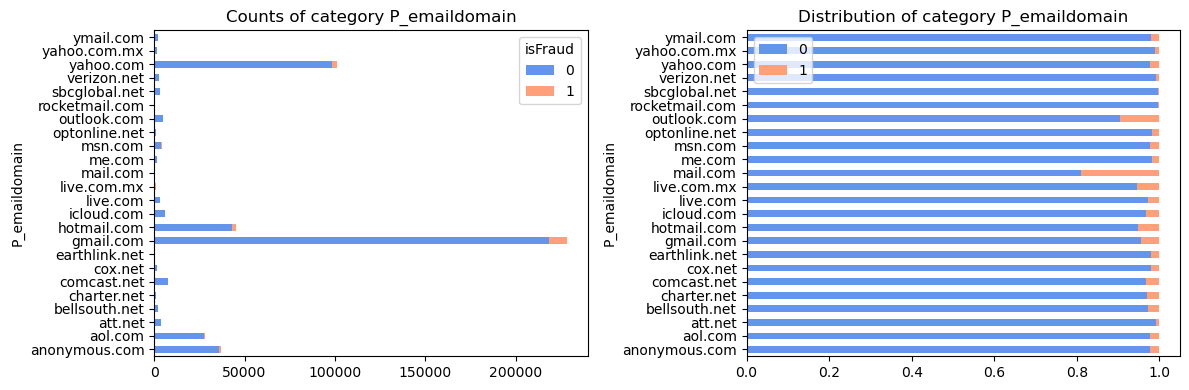

In [40]:
# select over 1% of email address and plotting the distribution

category_plot(df_train[df_train['P_emaildomain'].isin(topemail_list)], 'P_emaildomain')

**NOTE**

- Top purchaser email domain including gmail (46%), yahoo(20%), hotmail(9%) of the transactions.
- Among the top email domains, 'mail.com' with highest percentage of fraud cases ~20%, while 'outlook.com' contains ~10%

#### Further processing on emails by grouping on the same domain

In [41]:
# group email address from the same domain

df_train.loc[df_train['P_emaildomain'].str.contains('gmail')==True, 'P_emaildomain'] = 'gmail'
df_train.loc[df_train['P_emaildomain'].str.contains('yahoo')==True, 'P_emaildomain'] = 'yahoo'
df_train.loc[df_train['P_emaildomain'].str.contains('hotmail')==True, 'P_emaildomain'] = 'hotmail'
df_train.loc[df_train['P_emaildomain'].str.contains('outlook')==True, 'P_emaildomain'] = 'outlook'
df_train.loc[df_train['P_emaildomain'].str.contains('live')==True, 'P_emaildomain'] = 'live'

In [42]:
# check the distribution again

df_train['P_emaildomain'].value_counts(normalize=True, dropna=False).head()

gmail            0.387528
yahoo            0.174263
NaN              0.159949
hotmail          0.077903
anonymous.com    0.062651
Name: P_emaildomain, dtype: float64

In [43]:
# keep domain with larger than 0.1% while group the rest into 'other'

bottom_email = pd.DataFrame(df_train['P_emaildomain'].value_counts(normalize=True))
bottom_email = bottom_email[bottom_email['P_emaildomain']<0.001]
bottom_email = list(bottom_email.index)
bottom_email

['mac.com',
 'juno.com',
 'aim.com',
 'windstream.net',
 'roadrunner.com',
 'frontier.com',
 'embarqmail.com',
 'web.de',
 'netzero.com',
 'twc.com',
 'prodigy.net.mx',
 'centurylink.net',
 'netzero.net',
 'frontiernet.net',
 'q.com',
 'suddenlink.net',
 'cfl.rr.com',
 'sc.rr.com',
 'cableone.net',
 'gmx.de',
 'protonmail.com',
 'ptd.net',
 'servicios-ta.com']

In [44]:
# group the rest email address to 'other'

df_train.loc[df_train['P_emaildomain'].isin(bottom_email), 'P_emaildomain'] = 'other'

In [45]:
# check

df_train['P_emaildomain'].value_counts(normalize=True, dropna=False)

gmail             0.387528
yahoo             0.174263
NaN               0.159949
hotmail           0.077903
anonymous.com     0.062651
aol.com           0.047904
comcast.net       0.013357
icloud.com        0.010612
outlook           0.009371
other             0.008320
msn.com           0.006929
att.net           0.006829
live              0.006513
sbcglobal.net     0.005029
verizon.net       0.004581
ymail.com         0.004057
bellsouth.net     0.003233
me.com            0.002577
cox.net           0.002359
optonline.net     0.001712
charter.net       0.001382
rocketmail.com    0.001124
mail.com          0.000947
earthlink.net     0.000870
Name: P_emaildomain, dtype: float64

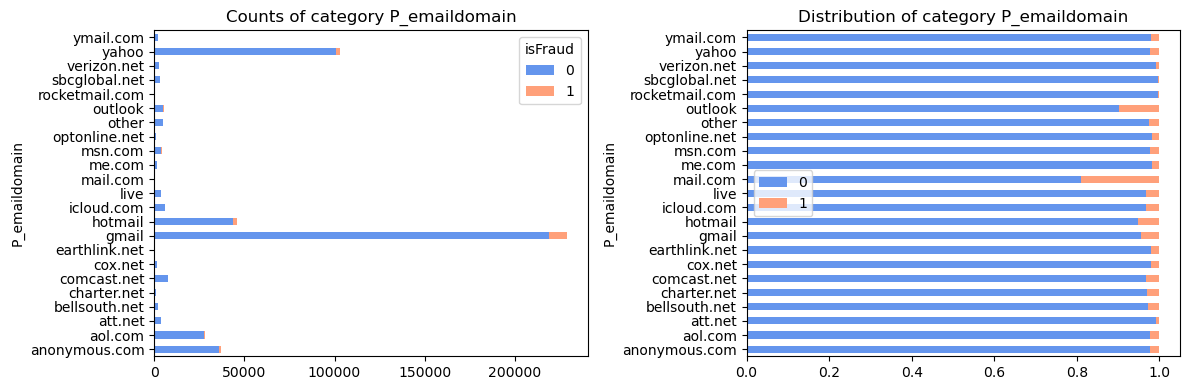

In [46]:
category_plot(df_train, 'P_emaildomain')

**NOTE**

- Top email domains with high percentage of fraud cases still ramins the same, which are 'mail.com', 'outlook.com'

#### Group test set purchaser email

In [48]:
df_test.loc[df_test['P_emaildomain'].str.contains('gmail')==True, 'P_emaildomain'] = 'gmail'
df_test.loc[df_test['P_emaildomain'].str.contains('yahoo')==True, 'P_emaildomain'] = 'yahoo'
df_test.loc[df_test['P_emaildomain'].str.contains('hotmail')==True, 'P_emaildomain'] = 'hotmail'
df_test.loc[df_test['P_emaildomain'].str.contains('outlook')==True, 'P_emaildomain'] = 'outlook'
df_test.loc[df_test['P_emaildomain'].str.contains('live')==True, 'P_emaildomain'] = 'live'

In [50]:
# group the rest email address to 'other'

df_test.loc[df_test['P_emaildomain'].isin(bottom_email), 'P_emaildomain'] = 'other'

### Receiver email domain

In [53]:
df_train['R_emaildomain'].value_counts(normalize=True, dropna=True).head(10)

gmail.com        0.416247
hotmail.com      0.200370
anonymous.com    0.149529
yahoo.com        0.086255
aol.com          0.026957
outlook.com      0.018260
comcast.net      0.013198
yahoo.com.mx     0.010984
icloud.com       0.010183
msn.com          0.006206
Name: R_emaildomain, dtype: float64

#### Grouping receiver email domains

In [54]:
# group email address from the same domain

df_train.loc[df_train['R_emaildomain'].str.contains('gmail')==True, 'R_emaildomain'] = 'gmail'
df_train.loc[df_train['R_emaildomain'].str.contains('yahoo')==True, 'R_emaildomain'] = 'yahoo'
df_train.loc[df_train['R_emaildomain'].str.contains('hotmail')==True, 'R_emaildomain'] = 'hotmail'
df_train.loc[df_train['R_emaildomain'].str.contains('outlook')==True, 'R_emaildomain'] = 'outlook'
df_train.loc[df_train['R_emaildomain'].str.contains('live')==True, 'R_emaildomain'] = 'live'

In [55]:
df_train['R_emaildomain'].value_counts(normalize=True).head()

gmail            0.416939
hotmail          0.205702
anonymous.com    0.149529
yahoo            0.099722
aol.com          0.026957
Name: R_emaildomain, dtype: float64

In [56]:
# since previously mail.com contains a large percentage of fraud cases, so will keep this address and group the rest into other

bottom_email_r = pd.DataFrame(df_train['R_emaildomain'].value_counts(normalize=True))
bottom_email_r = bottom_email_r[bottom_email_r['R_emaildomain']<0.0008]
bottom_email_r = list(bottom_email_r.index)
bottom_email_r

['earthlink.net',
 'rocketmail.com',
 'embarqmail.com',
 'scranton.edu',
 'juno.com',
 'roadrunner.com',
 'frontier.com',
 'windstream.net',
 'protonmail.com',
 'cfl.rr.com',
 'aim.com',
 'servicios-ta.com',
 'twc.com',
 'ptd.net',
 'cableone.net',
 'suddenlink.net',
 'q.com',
 'netzero.com',
 'frontiernet.net',
 'centurylink.net',
 'netzero.net',
 'sc.rr.com']

In [57]:
# group the rest email address to 'other'

df_train.loc[df_train['R_emaildomain'].isin(bottom_email_r), 'R_emaildomain'] = 'other'

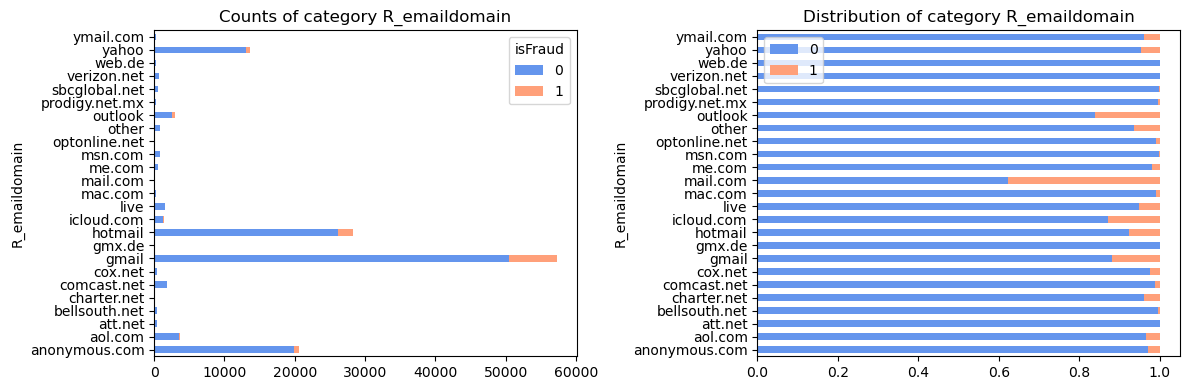

In [58]:
category_plot(df_train, 'R_emaildomain')

**NOTE**

- From the receiver's email domain, gmail and hotmail accounts a large proportion of the transactions, while mail.com still has the highest percentage of fraud cases which is close to 40%
- Additionally, this category contains 77% of NaN value, which also need to keep in mind of lacking information

#### Group test set receiver email

In [59]:
# group email address from the same domain

df_test.loc[df_test['R_emaildomain'].str.contains('gmail')==True, 'R_emaildomain'] = 'gmail'
df_test.loc[df_test['R_emaildomain'].str.contains('yahoo')==True, 'R_emaildomain'] = 'yahoo'
df_test.loc[df_test['R_emaildomain'].str.contains('hotmail')==True, 'R_emaildomain'] = 'hotmail'
df_test.loc[df_test['R_emaildomain'].str.contains('outlook')==True, 'R_emaildomain'] = 'outlook'
df_test.loc[df_test['R_emaildomain'].str.contains('live')==True, 'R_emaildomain'] = 'live'

In [60]:
# group the rest email address to 'other'

df_test.loc[df_test['R_emaildomain'].isin(bottom_email_r), 'R_emaildomain'] = 'other'

## C1-C14 

counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
https://www.kaggle.com/competitions/ieee-fraud-detection/discussion/101203

In [130]:
# look at the basic datatypes and format
summary[16:30]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
16,C1,float64,0,0.0,1657,0.0,1.0,1.0,1.0,2.0
17,C2,float64,0,0.0,1216,0.0,1.0,1.0,1.0,1.0
18,C3,float64,0,0.0,27,0.0,0.0,0.0,0.0,0.0
19,C4,float64,0,0.0,1260,0.0,0.0,0.0,0.0,0.0
20,C5,float64,0,0.0,319,0.0,0.0,0.0,0.0,1.0
21,C6,float64,0,0.0,1328,0.0,1.0,1.0,1.0,1.0
22,C7,float64,0,0.0,1103,0.0,0.0,0.0,0.0,0.0
23,C8,float64,0,0.0,1253,0.0,0.0,0.0,0.0,0.0
24,C9,float64,0,0.0,205,0.0,1.0,0.0,1.0,2.0
25,C10,float64,0,0.0,1231,0.0,0.0,0.0,0.0,0.0


In [147]:
# look at the values

df_train.iloc[:, 16:30].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


Since the data is significantly right skewed towards high values, so check the values of high quantile between Fraud and notFraud.

In [250]:
# check C1 as an example
C1_quantile = df_train.groupby('isFraud')['C1'].quantile([0.75, 0.9, 0.99]).reset_index()

In [251]:
C1_quantile

,isFraud,level_1,C1
0,0,0.75,3.00
1,0,0.90,6.00
2,0,0.99,159.00
3,1,0.75,6.00
4,1,0.90,30.00
5,1,0.99,510.38


In [245]:
# generate dataframe for high quantile values for all 14 columns

c_data = {}

for i in range(1,15):
    c_data['C'+str(i)] = pd.DataFrame(df_train.groupby('isFraud')['C'+str(i)].quantile([0.75, 0.9, 0.99]).reset_index())['C'+str(i)]

In [258]:
c_quantile = pd.DataFrame(data=c_data)
c_quantile

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,3.00,3.00,0.0,0.00,1.0,2.0,0.0,0.0,2.0,0.00,2.00,0.0,13.00,2.00
1,6.00,6.00,0.0,1.00,3.0,4.0,1.0,1.0,4.0,1.00,4.00,1.0,38.00,5.00
2,159.00,148.00,0.0,3.00,150.0,117.0,2.0,8.0,96.0,9.00,118.00,3.0,577.00,128.00
3,6.00,7.00,0.0,2.00,0.0,3.0,1.0,2.0,1.0,2.00,4.00,2.0,6.00,2.00
4,30.00,40.00,0.0,7.00,0.0,10.0,6.0,13.0,3.0,10.00,17.00,10.0,20.00,5.00
5,510.38,876.38,0.0,206.04,26.0,211.0,91.0,363.0,28.0,269.94,396.38,163.0,632.76,162.38


In [259]:
# insert column information

c_quantile.insert(loc = 0,
                  column = 'isFraud',
                  value = C1_quantile['isFraud'])
c_quantile.insert(loc = 0,
                  column = 'Quantile',
                  value = C1_quantile['level_1'])
c_quantile

,Quantile,isFraud,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,0.75,0,3.00,3.00,0.0,0.00,1.0,2.0,0.0,0.0,2.0,0.00,2.00,0.0,13.00,2.00
1,0.90,0,6.00,6.00,0.0,1.00,3.0,4.0,1.0,1.0,4.0,1.00,4.00,1.0,38.00,5.00
2,0.99,0,159.00,148.00,0.0,3.00,150.0,117.0,2.0,8.0,96.0,9.00,118.00,3.0,577.00,128.00
3,0.75,1,6.00,7.00,0.0,2.00,0.0,3.0,1.0,2.0,1.0,2.00,4.00,2.0,6.00,2.00
4,0.90,1,30.00,40.00,0.0,7.00,0.0,10.0,6.0,13.0,3.0,10.00,17.00,10.0,20.00,5.00
5,0.99,1,510.38,876.38,0.0,206.04,26.0,211.0,91.0,363.0,28.0,269.94,396.38,163.0,632.76,162.38


**NOTE**

The counting columns for payment information:

- there's no missing values for these columns
- majority values within 75% quantile for each column is less than or equal to 3
- distribution of these columns is significantly right skewed
- for columns `C4` & `C9` fraud cases has lower high quantile values, while the rest columns all the fraud classes have higher quantile values.


## D1 - D15

D1-D15: timedelta, such as days between previous transaction, etc.

In [262]:
# check datatype for D1-D15
summary[30:38]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
30,D1,float64,1269,0.00,641,0.0,14.0,0.0,0.0,0.0
31,D2,float64,280797,0.48,641,0.0,NaN,NaN,NaN,NaN
32,D3,float64,262878,0.45,649,0.0,13.0,NaN,NaN,0.0
33,D4,float64,168922,0.29,808,0.0,NaN,0.0,0.0,1.0
34,D5,float64,309841,0.52,688,0.0,NaN,NaN,NaN,0.0
35,D10,float64,76022,0.13,818,0.0,13.0,0.0,0.0,1.0
36,D11,float64,279287,0.47,676,0.0,13.0,NaN,315.0,0.0
37,D15,float64,89113,0.15,859,0.0,0.0,0.0,315.0,1.0


In [264]:
# since these columns are all numeric, so check the basic values

# look at the values

df_train.iloc[:,30:38].describe()

,D1,D2,D3,D4,D5,D10,D11,D15
count,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,514518.000000,311253.000000,501427.000000
mean,94.347568,169.563231,28.343348,140.002441,42.335965,123.982137,146.621465,163.744579
std,157.660387,177.315865,62.384721,191.096774,89.000144,182.615225,186.042622,202.726660
min,0.000000,0.000000,0.000000,-122.000000,0.000000,0.000000,-53.000000,-83.000000
25%,0.000000,26.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,97.000000,8.000000,26.000000,10.000000,15.000000,43.000000,52.000000
75%,122.000000,276.000000,27.000000,253.000000,32.000000,197.000000,274.000000,314.000000
max,640.000000,640.000000,819.000000,869.000000,819.000000,876.000000,670.000000,879.000000


### Check the distribution of the values

Since the data is significantly right skewed, so covert frequency to log scale

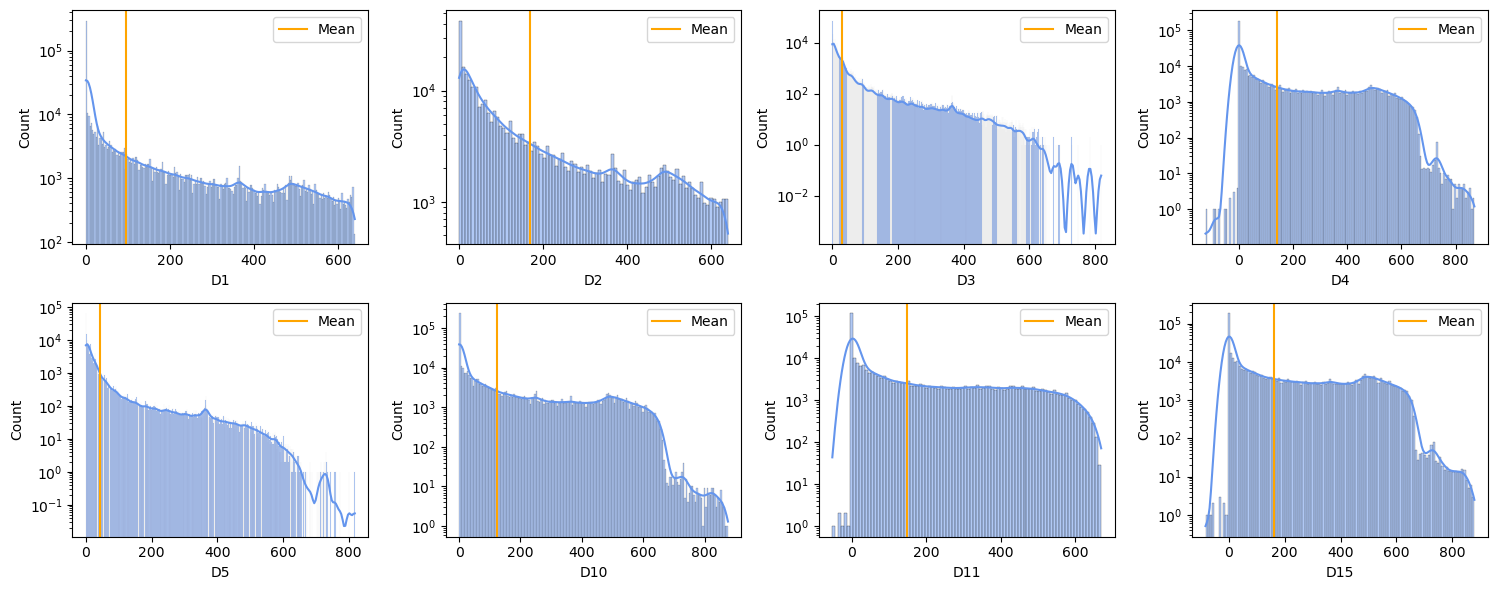

In [272]:
# look at the distribution

plt.subplots(2, 4, figsize=(15,6))

for i, column in enumerate(df_train.columns[30:38], 1):
    plt.subplot(2,4,i)
    sns.histplot(data=df_train[column], color='cornflowerblue', kde=True)
    plt.axvline(df_train[column].mean(), c='orange', label='Mean')
    plt.legend()
    plt.yscale("log")
    
plt.tight_layout()
plt.show()

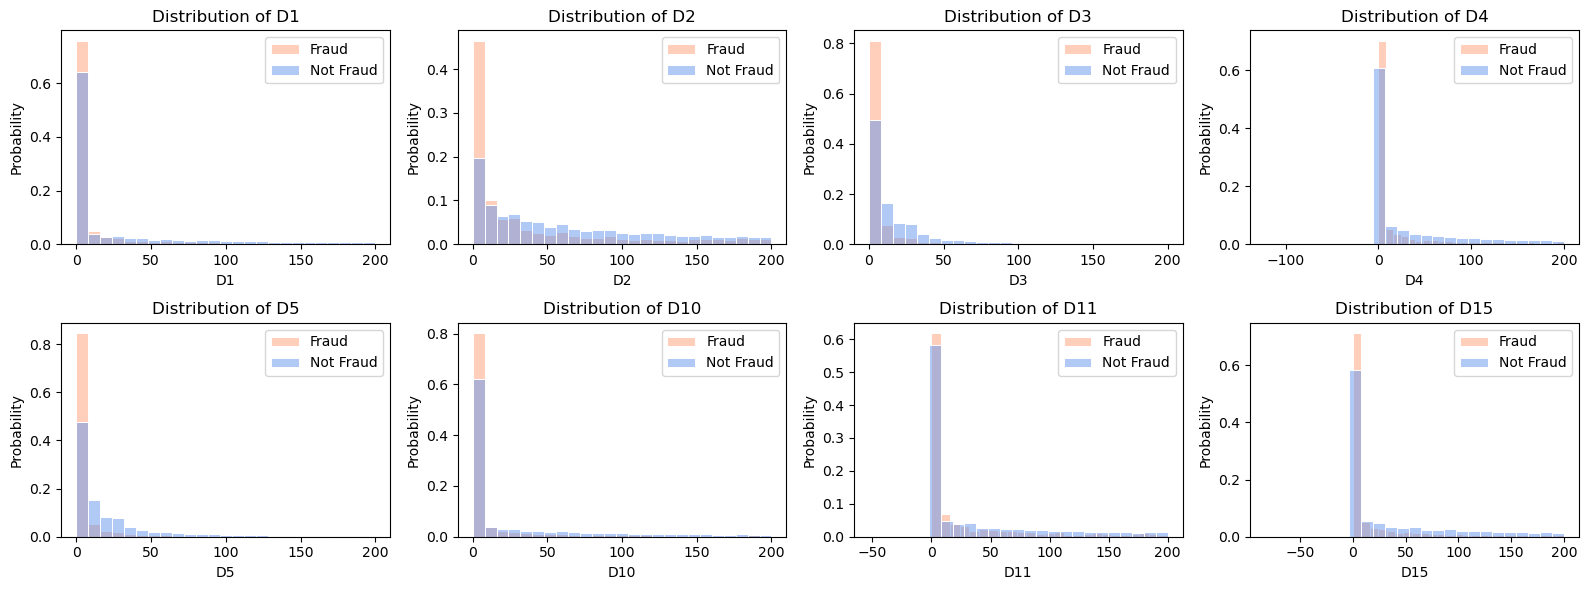

In [278]:
# check distribution comparison between fraud and not fraud classes for ~75% quantile of values, as the data is right skewed

plt.subplots(2,4,figsize=(16,6))

for i, column in enumerate(df_train.columns[30:38], 1):
    plt.subplot(2,4,i)
    histcompare_plot2(df_train[df_train[column]<=200], column)

plt.tight_layout()
plt.show()

**NOTE**

- values of timedelta range mainly from 0 to ~650 or ~850
- data is heavily right skewed, and column D3 and D5 are even more heavily right skewed with mean value close to 30, 40 separately
- by looking at the probability distribution between two classes, fraud cases showing much higher proportion for lower values, especially columns `D2`, `D3` and `D5`


## M1-M9

match, such as names on card and address, etc.

In [313]:
# check column type and info

summary[38:47]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
38,M1,object,271100,0.46,2,0.0,T,NaN,T,T
39,M2,object,271100,0.46,2,0.0,T,NaN,T,F
40,M3,object,271100,0.46,2,0.0,T,NaN,T,F
41,M4,object,281444,0.48,3,0.0,M2,M0,M0,NaN
42,M5,object,350482,0.59,2,0.0,F,T,F,NaN
43,M6,object,169360,0.29,2,0.0,T,T,F,T
44,M7,object,346265,0.59,2,0.0,NaN,NaN,F,F
45,M8,object,346252,0.59,2,0.0,NaN,NaN,F,F
46,M9,object,346252,0.59,2,0.0,NaN,NaN,F,F


Most of the M columns are object data types contains 2 unique values of T and F, except column M4, which contains 3 values.

In [107]:
def category_plot_adj(df, name1, name2='isFraud'):
    count_df = df.groupby([str(name1), str(name2)])[str(name1)].count().unstack()
    distribution_df = pd.crosstab(df[str(name1)], df[str(name2)], normalize='index')
    my_colors=['cornflowerblue', 'lightsalmon']
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,2))
    count_df.plot(kind='barh', stacked=True, ax=axes[0], color=my_colors, title=f'Counts of category {name1}')
    distribution_df.plot(kind='barh', stacked=True, ax=axes[1], color=my_colors, title=f'Distribution of category {name1}')
    plt.legend()
    plt.tight_layout()
    plt.show()

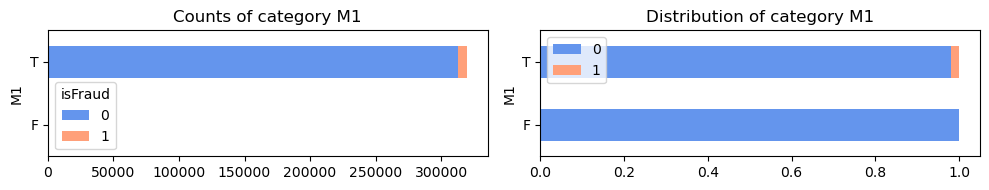

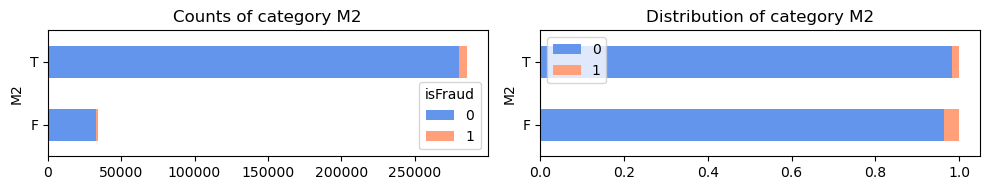

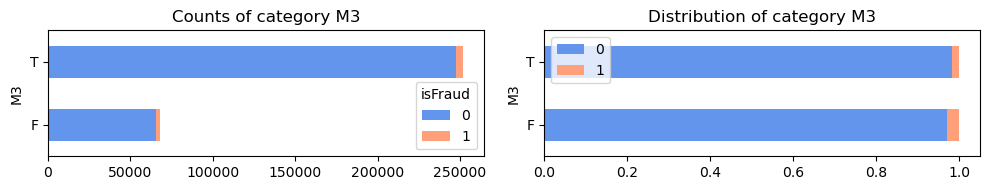

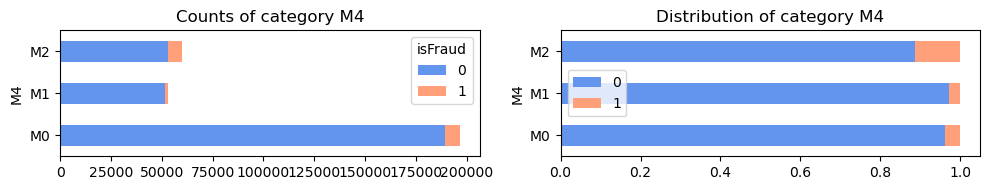

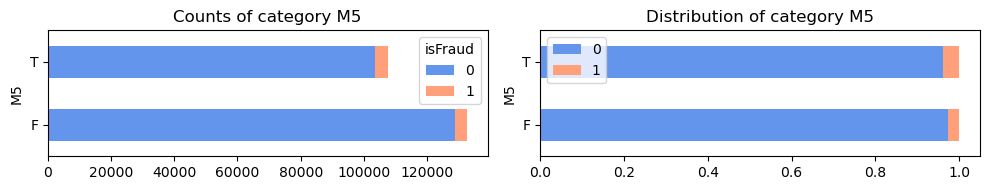

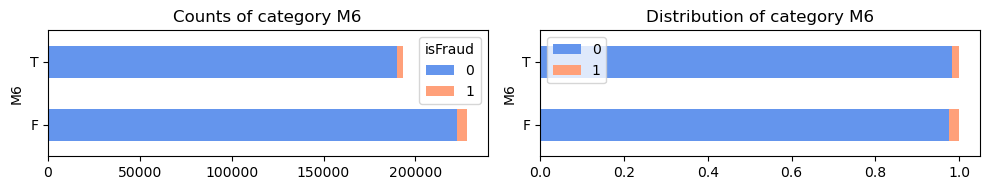

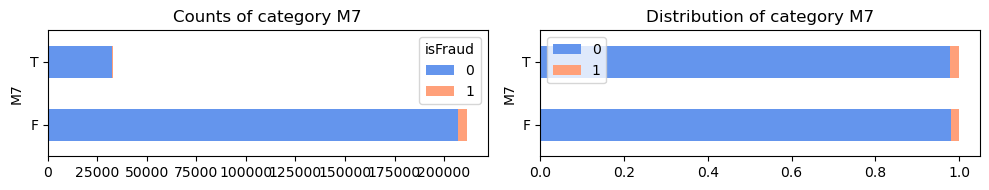

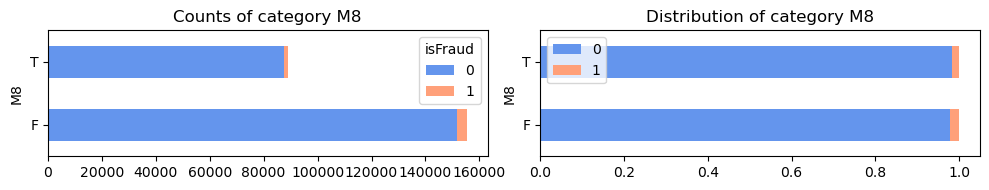

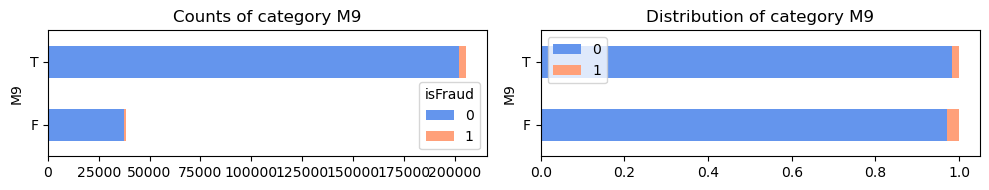

In [108]:
for i in range(1, 10):
    category_plot_adj(df_train, 'M'+str(i))

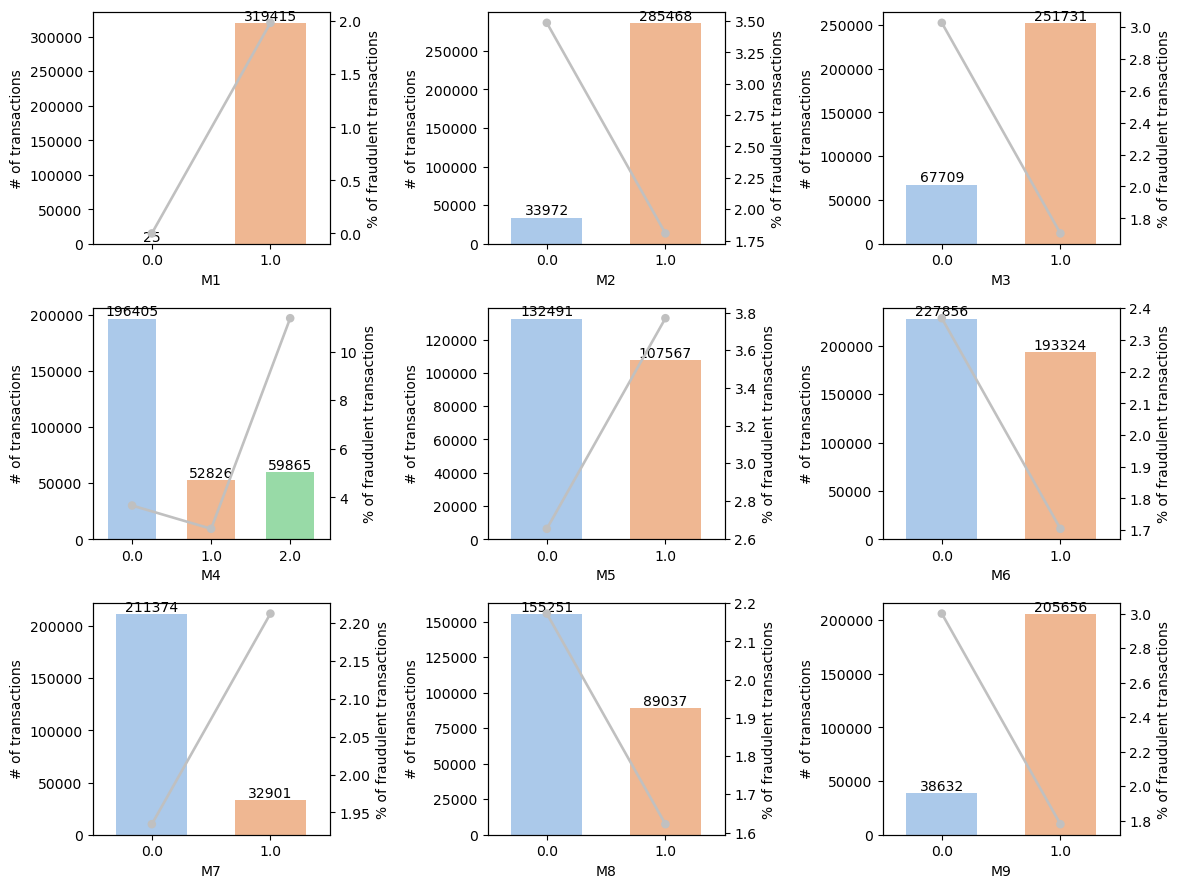

In [207]:
plt.subplots(3,3,figsize=(12,9))

for i, column in enumerate(df_train.columns[38:47], 1):
    plt.subplot(3,3,i)
    category_plot2(df_train, column)

plt.tight_layout()
plt.show()

**NOTE**

- `M1`, `M5` & `M7`, 'T' has higher pecentage of fradulent transactions comapred with 'F', while the rest columns are vise versa
- 'M2' in `M4` has a high percentage of fraudulent transactions, which is over 11%

### Converting to numeric values

In [61]:
# convert object to numeric values for M columns
for i in range(1,4):
    df_train['M'+str(i)] = df_train['M'+str(i)].map({'T': 1, 'F': 0})

In [62]:
for i in range(5,10):
    df_train['M'+str(i)] = df_train['M'+str(i)].map({'T': 1, 'F': 0})

In [63]:
df_train['M4'] = df_train['M4'].map({'M0': 0, 'M1':1, 'M2': 2})

In [64]:
# check datatype

df_train.loc[:,df_train.columns.str.contains('M')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   M1      319440 non-null  float64
 1   M2      319440 non-null  float64
 2   M3      319440 non-null  float64
 3   M4      309096 non-null  float64
 4   M5      240058 non-null  float64
 5   M6      421180 non-null  float64
 6   M7      244275 non-null  float64
 7   M8      244288 non-null  float64
 8   M9      244288 non-null  float64
dtypes: float64(9)
memory usage: 61.2 MB


### Convert columns in test dataset

In [65]:
df_test.loc[:, df_test.columns.str.contains('M')].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,F,NaN,NaN,F,T,T,T
1,T,F,F,M0,NaN,F,NaN,NaN,NaN
2,T,T,F,M0,F,F,F,F,F
3,T,T,T,NaN,NaN,T,NaN,NaN,NaN
4,T,T,T,NaN,NaN,F,F,T,T


In [66]:
for i in range(1,4):
    df_test['M'+str(i)] = df_test['M'+str(i)].map({'T': 1, 'F': 0})

In [67]:
for i in range(5,10):
    df_test['M'+str(i)] = df_test['M'+str(i)].map({'T': 1, 'F': 0})

In [68]:
df_test['M4'] = df_test['M4'].map({'M0': 0, 'M1':1, 'M2': 2})

In [69]:
# check

df_test.loc[:,df_test.columns.str.contains('M')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   M1      330052 non-null  float64
 1   M2      330052 non-null  float64
 2   M3      330052 non-null  float64
 3   M4      268946 non-null  float64
 4   M5      197059 non-null  float64
 5   M6      347752 non-null  float64
 6   M7      271673 non-null  float64
 7   M8      271687 non-null  float64
 8   M9      271687 non-null  float64
dtypes: float64(9)
memory usage: 38.7 MB


## V1-V321

Vxxx: engineered rich features, including ranking, counting, and other entity relations.

Since all engineered features, and the data types are all float, so skip this part for now.

## id_01 - id_38

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.

Categorical Features:

- DeviceType
- id_12 - id_38

In [379]:
# check data type and basic info

summary[summary['Name'].str.contains('id_')]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
339,id_01,float64,446307,0.76,77,0.0,NaN,NaN,NaN,NaN
340,id_02,float64,449668,0.76,115655,0.2,NaN,NaN,NaN,NaN
341,id_05,float64,453675,0.77,93,0.0,NaN,NaN,NaN,NaN
342,id_06,float64,453675,0.77,101,0.0,NaN,NaN,NaN,NaN
343,id_11,float64,449562,0.76,365,0.0,NaN,NaN,NaN,NaN
344,id_12,object,446307,0.76,2,0.0,NaN,NaN,NaN,NaN
345,id_13,float64,463220,0.78,54,0.0,NaN,NaN,NaN,NaN
346,id_15,object,449555,0.76,3,0.0,NaN,NaN,NaN,NaN
347,id_16,object,461200,0.78,2,0.0,NaN,NaN,NaN,NaN
348,id_17,float64,451171,0.76,104,0.0,NaN,NaN,NaN,NaN


### Check numeric id columns

In [380]:
# check numeric data columns

df_train.loc[:, 'id_01': 'id_38'].describe()

,id_01,id_02,id_05,id_06,id_11,id_13,id_17,id_19,id_20
count,144233.000000,140872.000000,136865.000000,136865.000000,140978.000000,127320.000000,139369.000000,139318.000000,139261.000000
mean,-10.170502,174716.584708,1.615585,-6.698710,99.745325,48.053071,189.451377,353.128174,403.882666
std,14.347949,159651.816856,5.249856,16.491104,1.127602,11.774858,30.375360,141.095343,152.160327
min,-100.000000,1.000000,-72.000000,-100.000000,90.000000,10.000000,100.000000,100.000000,100.000000
25%,-10.000000,67992.000000,0.000000,-6.000000,100.000000,49.000000,166.000000,266.000000,256.000000
50%,-5.000000,125800.500000,0.000000,0.000000,100.000000,52.000000,166.000000,341.000000,472.000000
75%,-5.000000,228749.000000,1.000000,0.000000,100.000000,52.000000,225.000000,427.000000,533.000000
max,0.000000,999595.000000,52.000000,0.000000,100.000000,64.000000,229.000000,671.000000,661.000000


In [136]:
# get numeric id columns

summary_id = summary[summary['Name'].str.contains('id_')]

In [137]:
id_num_col = list(summary_id[summary_id['dtypes'] == 'float64']['Name'])
id_num_col

['id_01',
 'id_02',
 'id_05',
 'id_06',
 'id_11',
 'id_13',
 'id_17',
 'id_19',
 'id_20']

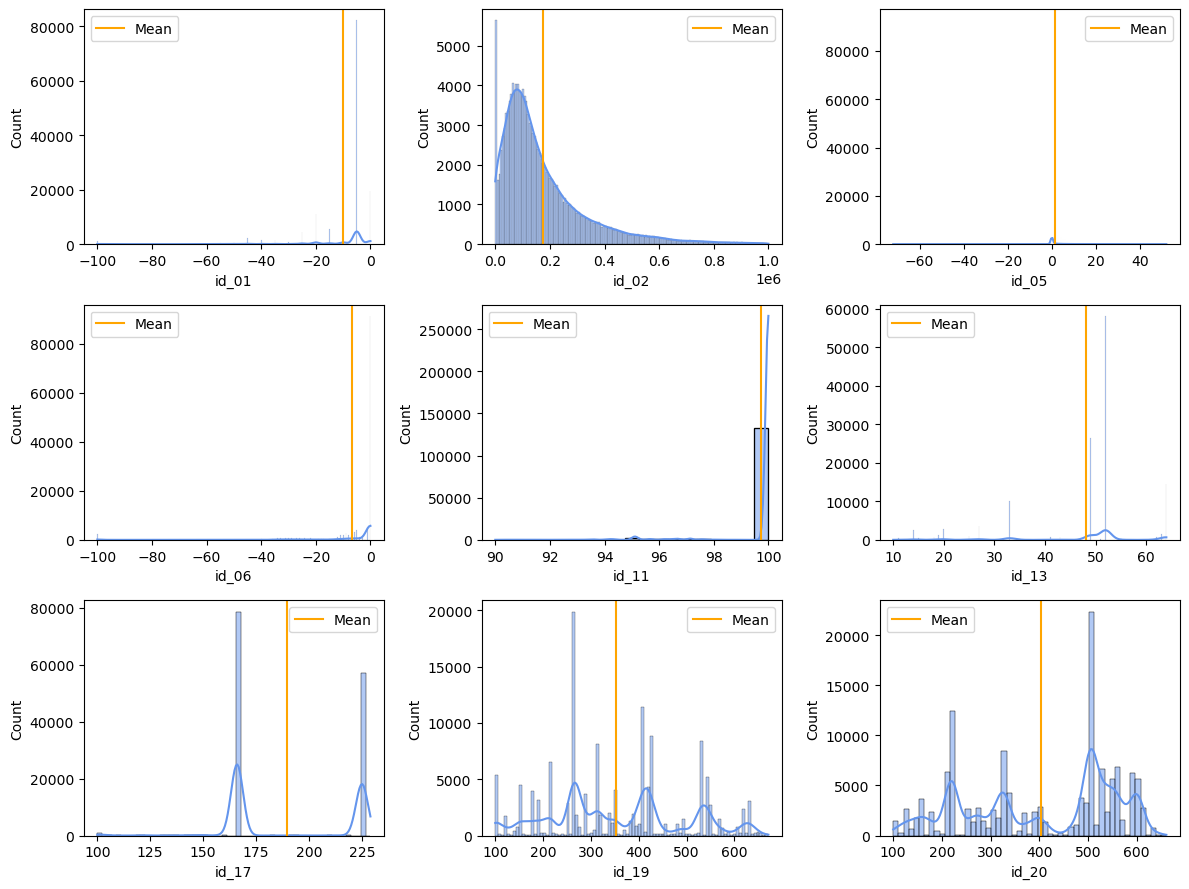

In [142]:
# look at the distribution

plt.subplots(3, 3, figsize=(12,9))

for i, column in enumerate(id_num_col, 1):
    plt.subplot(3,3,i)
    sns.histplot(data=df_train[column], color='cornflowerblue', kde=True)
    plt.axvline(df_train[column].mean(), c='orange', label='Mean')
    plt.legend()
    # plt.yscale("log")
    
plt.tight_layout()
plt.show()

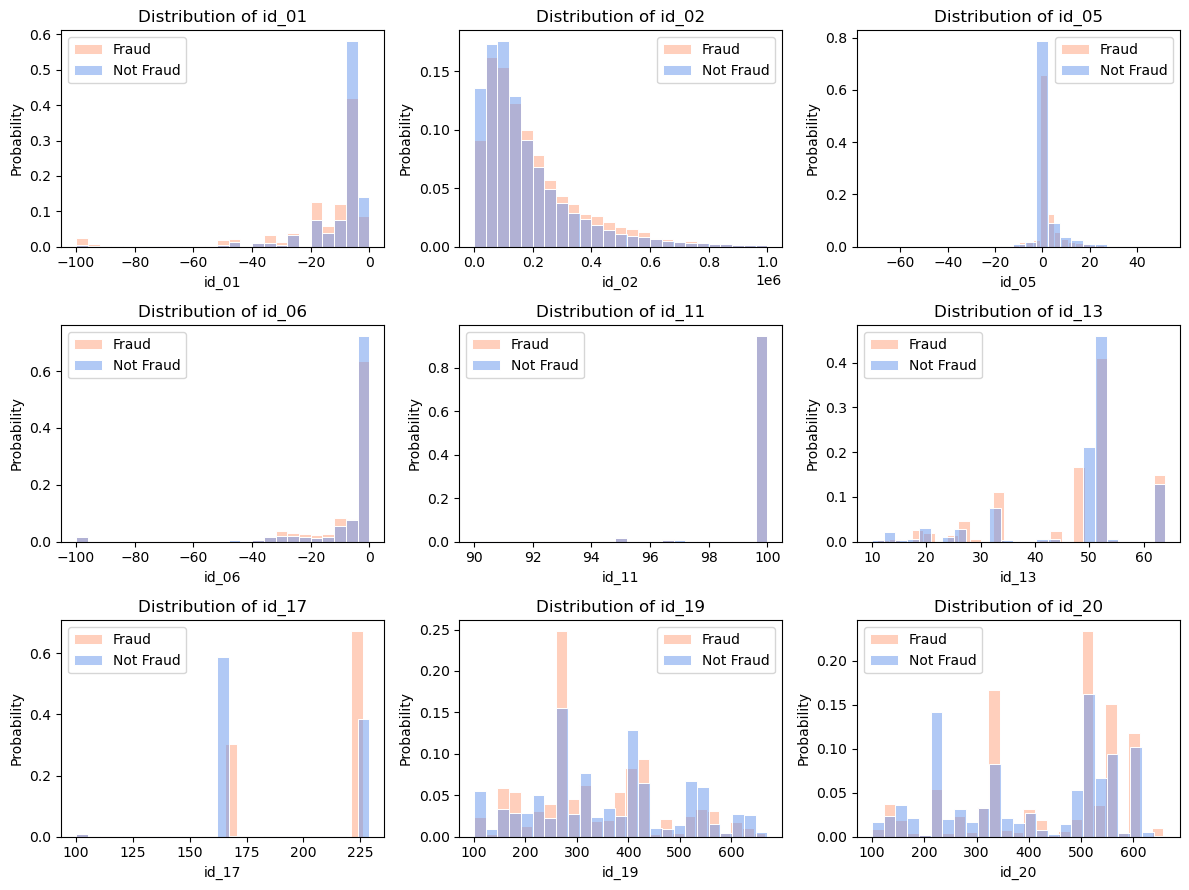

In [140]:
# look at the distribution across two classes

plt.subplots(3,3,figsize=(12,9))

for i, column in enumerate(id_num_col, 1):
    plt.subplot(3,3,i)
    histcompare_plot2(df_train, column)

plt.tight_layout()
plt.show()

**NOTE**

- id_01 to id_13, the probability distribution for fraud and not fraud cases are almost overlap
- `id_17`, probability of fraudulent transactions is higher for value ~225, while lower for value ~166
- `id_19`, probability of fraudulent transactions is higher at value ~270
- `id_20`, higher probability of fraudulent transactions are at value ~350, ~500 and ~550

### Check object id columns

In [144]:
summary_id[summary_id['dtypes'] == 'object']

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
344,id_12,object,446307,0.76,2,0.0,NaN,NaN,NaN,NaN
346,id_15,object,449555,0.76,3,0.0,NaN,NaN,NaN,NaN
347,id_16,object,461200,0.78,2,0.0,NaN,NaN,NaN,NaN
351,id_28,object,449562,0.76,2,0.0,NaN,NaN,NaN,NaN
352,id_29,object,449562,0.76,2,0.0,NaN,NaN,NaN,NaN
353,id_31,object,450258,0.76,130,0.0,NaN,NaN,NaN,NaN
354,id_35,object,449555,0.76,2,0.0,NaN,NaN,NaN,NaN
355,id_36,object,449555,0.76,2,0.0,NaN,NaN,NaN,NaN
356,id_37,object,449555,0.76,2,0.0,NaN,NaN,NaN,NaN
357,id_38,object,449555,0.76,2,0.0,NaN,NaN,NaN,NaN


#### Look at the id_31 column first

In [146]:
# look at the values
df_train['id_31'].value_counts()

chrome 63.0                22000
mobile safari 11.0         13423
mobile safari generic      11474
ie 11.0 for desktop         9030
safari generic              8195
                           ...  
iron                           1
LG/K-200                       1
cyberfox                       1
Nokia/Lumia                    1
chrome 67.0 for android        1
Name: id_31, Length: 130, dtype: int64

In [153]:
df_train['id_31'].value_counts(normalize=True, dropna=False).head(30)

NaN                           0.762451
chrome 63.0                   0.037254
mobile safari 11.0            0.022730
mobile safari generic         0.019430
ie 11.0 for desktop           0.015291
safari generic                0.013877
chrome 62.0                   0.012162
chrome 65.0                   0.011635
chrome 64.0                   0.011364
chrome 63.0 for android       0.009832
chrome generic                0.008091
chrome 66.0                   0.007221
edge 16.0                     0.007092
chrome 64.0 for android       0.005881
chrome 65.0 for android       0.005649
firefox 57.0                  0.005614
mobile safari 10.0            0.004706
chrome 66.0 for android       0.003978
chrome 62.0 for android       0.003551
edge 15.0                     0.002709
chrome generic for android    0.001961
firefox 59.0                  0.001861
samsung browser 6.2           0.001797
firefox 58.0                  0.001411
chrome 49.0                   0.001218
firefox                  

In [151]:
df_train['id_31'].str.contains('chrome',na=False)

0         False
1         False
2         False
3         False
4         False
          ...  
590535    False
590536    False
590537    False
590538    False
590539    False
Name: id_31, Length: 590540, dtype: bool

In [70]:
# group values
df_train.loc[df_train['id_31'].str.contains('chrome', na=False), 'id_31'] = 'chrome'
df_train.loc[df_train['id_31'].str.contains('safari', na=False), 'id_31'] = 'safari'
df_train.loc[df_train['id_31'].str.contains('ie', na=False), 'id_31'] = 'ie'
df_train.loc[df_train['id_31'].str.contains('edge', na=False), 'id_31'] = 'edge'
df_train.loc[df_train['id_31'].str.contains('firefox',na=False), 'id_31'] = 'firefox'
df_train.loc[df_train['id_31'].str.contains('samsung',na=False, case=False), 'id_31'] = 'samsung'
df_train.loc[df_train['id_31'].str.contains('google',na=False), 'id_31'] = 'google'
df_train.loc[df_train['id_31'].str.contains('opera',na=False), 'id_31'] = 'opera'
df_train.loc[df_train['id_31'].str.contains('android', na=False, case=False), 'id_31'] = 'android'

In [71]:
df_train['id_31'].value_counts(dropna=False)

NaN                  450258
chrome                76059
safari                37281
ie                    10018
firefox                7012
edge                   6401
samsung                2247
opera                   449
other                   312
android                 239
google                  146
Microsoft/Windows        25
silk                     19
mobile                   11
ZTE/Blade                 9
comodo                    6
maxthon                   6
line                      6
aol                       5
icedragon                 5
Mozilla/Firefox           5
Lanix/Ilium               3
puffin                    2
facebook                  2
palemoon                  2
waterfox                  2
BLU/Dash                  1
Nokia/Lumia               1
M4Tel/M4                  1
iron                      1
LG/K-200                  1
chromium                  1
Inco/Minion               1
Cherry                    1
cyberfox                  1
seamonkey           

In [72]:
# group the value counts less than 100 to 'other'

bottom_id31 = df_train['id_31'].value_counts()
bottom_id31 = bottom_id31[bottom_id31 < 100]
bottom_id31 = list(bottom_id31.index)
bottom_id31

['Microsoft/Windows',
 'silk',
 'mobile',
 'ZTE/Blade',
 'comodo',
 'maxthon',
 'line',
 'aol',
 'icedragon',
 'Mozilla/Firefox',
 'Lanix/Ilium',
 'puffin',
 'facebook',
 'palemoon',
 'waterfox',
 'BLU/Dash',
 'Nokia/Lumia',
 'M4Tel/M4',
 'iron',
 'LG/K-200',
 'chromium',
 'Inco/Minion',
 'Cherry',
 'cyberfox',
 'seamonkey']

In [73]:
# group the rest email address to 'other'

df_train.loc[df_train['id_31'].isin(bottom_id31), 'id_31'] = 'other'

In [74]:
df_train['id_31'].value_counts()

chrome     76059
safari     37281
ie         10018
firefox     7012
edge        6401
samsung     2247
opera        449
other        430
android      239
google       146
Name: id_31, dtype: int64

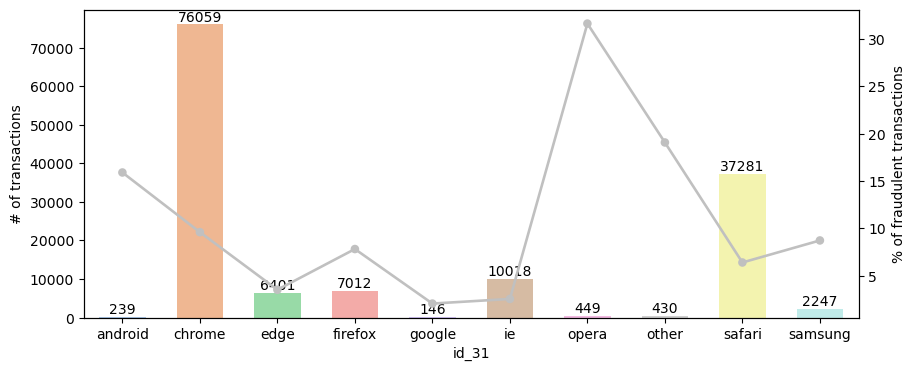

In [75]:
# plotting the distribution of transactions
plt.figure(figsize=(10,4))
category_plot2(df_train, 'id_31')

- opera's percentage of fraudulent transactions is the highest among these categories with over 30%, while chrome is the most popular web browser

##### Group test set browser

In [77]:
df_test.loc[df_test['id_31'].str.contains('chrome', na=False), 'id_31'] = 'chrome'
df_test.loc[df_test['id_31'].str.contains('safari', na=False), 'id_31'] = 'safari'
df_test.loc[df_test['id_31'].str.contains('ie', na=False), 'id_31'] = 'ie'
df_test.loc[df_test['id_31'].str.contains('edge', na=False), 'id_31'] = 'edge'
df_test.loc[df_test['id_31'].str.contains('firefox',na=False), 'id_31'] = 'firefox'
df_test.loc[df_test['id_31'].str.contains('samsung',na=False, case=False), 'id_31'] = 'samsung'
df_test.loc[df_test['id_31'].str.contains('google',na=False), 'id_31'] = 'google'
df_test.loc[df_test['id_31'].str.contains('opera',na=False), 'id_31'] = 'opera'
df_test.loc[df_test['id_31'].str.contains('android', na=False, case=False), 'id_31'] = 'android'

In [78]:
# group the rest email address to 'other'

df_test.loc[df_test['id_31'].isin(bottom_id31), 'id_31'] = 'other'

#### Look at the rest id columns

In [195]:
id_categ_column = list(summary_id[summary_id['dtypes'] == 'object']['Name'].values)

In [197]:
id_categ_column.remove('id_31')

In [198]:
id_categ_column

['id_12',
 'id_15',
 'id_16',
 'id_28',
 'id_29',
 'id_35',
 'id_36',
 'id_37',
 'id_38']

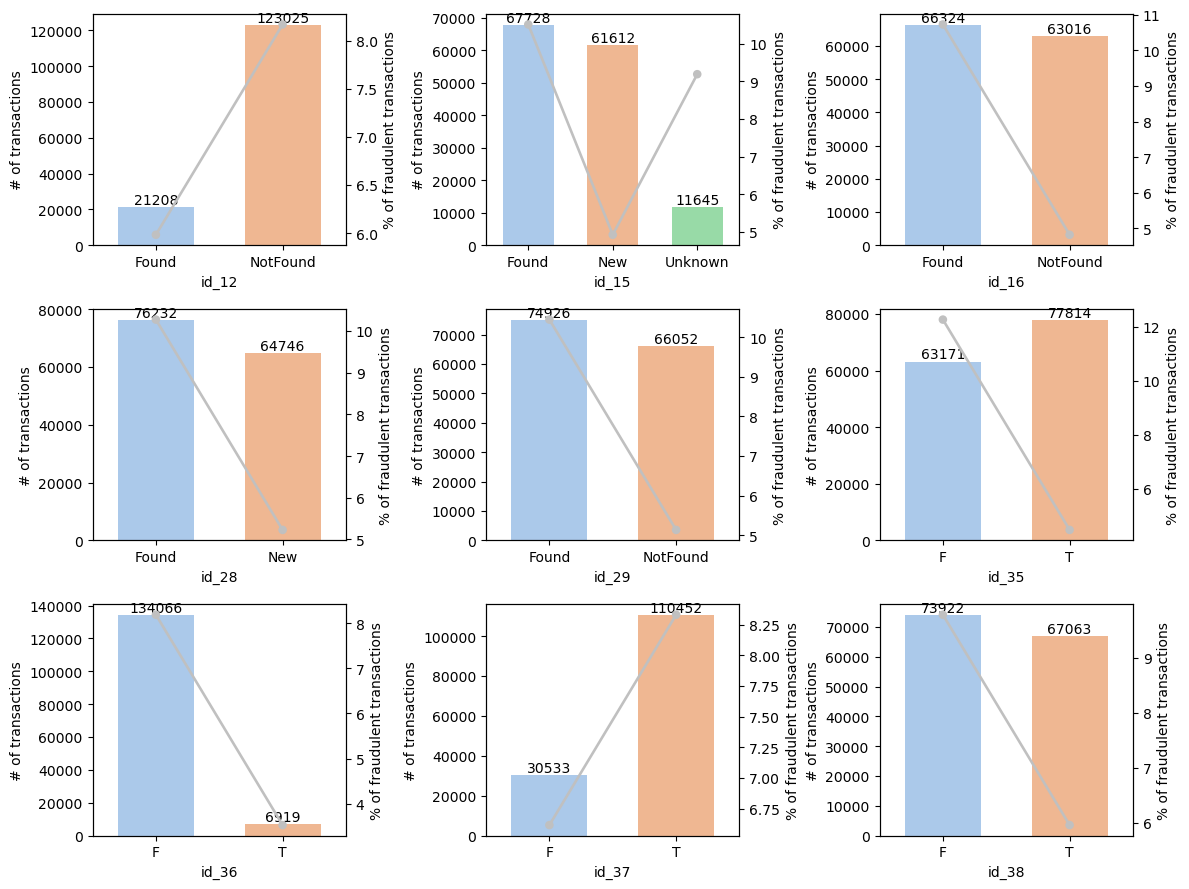

In [206]:
plt.subplots(3,3,figsize=(12,9))

for i, column in enumerate(id_categ_column, 1):
    plt.subplot(3,3,i)
    category_plot2(df_train, column)

plt.tight_layout()
plt.show()

**NOTE**

- majority of the columns has higher percentage of fraud cases in category F or Found
- `id_35` generates highest fraud percentage for F category, while `id_16` also have high percentage of fraud for Found category


##### Convert object values to numeric

In [80]:
# convert T, F to numeric values for id columns

for i in [35, 36, 37, 38]:
    df_train['id_'+str(i)] = df_train['id_'+str(i)].map({'T': 1, 'F': 0})

In [81]:
# convert Fount to 1, NotFound to 0

for i in [12, 16, 29]:
    df_train['id_'+str(i)] = df_train['id_'+str(i)].map({'Found': 1, 'NotFound': 0})

In [82]:
df_train['id_15'] = df_train['id_15'].map({'Found': 1, 'New': 0, 'Unknown': 2})
df_train['id_28'] = df_train['id_28'].map({'Found': 1, 'New': 0,})

In [86]:
df_train.iloc[:, 344:358].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id_12   144233 non-null  float64
 1   id_13   127320 non-null  float64
 2   id_15   140985 non-null  float64
 3   id_16   129340 non-null  float64
 4   id_17   139369 non-null  float64
 5   id_19   139318 non-null  float64
 6   id_20   139261 non-null  float64
 7   id_28   140978 non-null  float64
 8   id_29   140978 non-null  float64
 9   id_31   140282 non-null  object 
 10  id_35   140985 non-null  float64
 11  id_36   140985 non-null  float64
 12  id_37   140985 non-null  float64
 13  id_38   140985 non-null  float64
dtypes: float64(13), object(1)
memory usage: 83.7+ MB


In [89]:
df_train.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ProductCD      590540 non-null  object
 1   card4          588963 non-null  object
 2   card6          588969 non-null  object
 3   P_emaildomain  496084 non-null  object
 4   R_emaildomain  137291 non-null  object
 5   id_31          140282 non-null  object
 6   DeviceType     140810 non-null  object
dtypes: object(7)
memory usage: 52.2+ MB


In [112]:
df_train.shape

(590540, 359)

##### Convert test set id columns

In [101]:
# convert T, F to numeric values for id columns

for i in [35, 36, 37, 38]:
    df_test['id_'+str(i)] = df_test['id_'+str(i)].map({'T': 1, 'F': 0})

In [105]:
# convert Fount to 1, NotFound to 0

for i in [12, 16, 29]:
    df_test['id_'+str(i)] = df_test['id_'+str(i)].map({'Found': 1, 'NotFound': 0})

In [108]:
df_test['id_15'] = df_test['id_15'].map({'Found': 1, 'New': 0, 'Unknown': 2})
df_test['id_28'] = df_test['id_28'].map({'Found': 1, 'New': 0,})

In [111]:
df_test.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ProductCD      506691 non-null  object
 1   card4          503605 non-null  object
 2   card6          503684 non-null  object
 3   P_emaildomain  437499 non-null  object
 4   R_emaildomain  135870 non-null  object
 5   id_31          136625 non-null  object
 6   DeviceType     136931 non-null  object
dtypes: object(7)
memory usage: 30.9+ MB


In [113]:
df_test.shape

(506691, 358)

## DeviceType

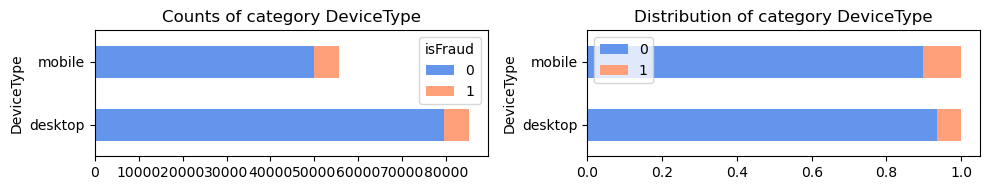

In [135]:
category_plot_adj(df_train, 'DeviceType')

# Save processed dataset

In [114]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,542.0,144.0,0.0,0.0,samsung,1.0,0.0,1.0,1.0,mobile


In [115]:
df_train.to_csv('data/train_clean.csv', index=False)

In [116]:
df_test.to_csv('data/test_clean.csv', index=False)

Further preprocessing and modeling TBC...